In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris(return_X_y = False)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:,2:]
y = iris.target
print(X.shape , y.shape)

(150, 2) (150,)


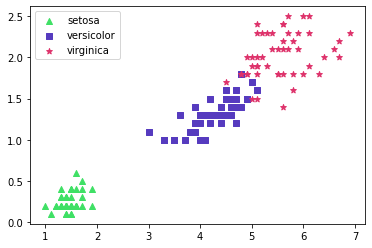

In [5]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
samples = (y==0) | (y == 1)
samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [8]:
X , y = X[samples] , y[samples]
print(X.shape , y.shape) 

(100, 2) (100,)


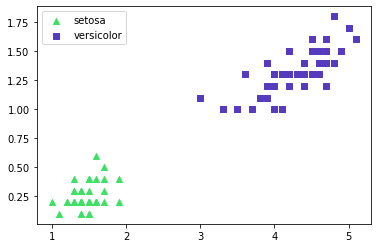

In [9]:
colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i,name in enumerate(iris.target_names[:-1]):
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=name)
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_test_split?

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [21]:
print(X_train.shape , y_train.shape)

(78, 2) (78,)


In [22]:
print(X_test.shape , y_test.shape)

(22, 2) (22,)


### Linear SVM

In [23]:
from sklearn.svm import LinearSVC

In [24]:
lin_svc = LinearSVC()

In [25]:
lin_svc.fit(X_train,y_train)

LinearSVC()

In [27]:
y_pred = lin_svc.predict(X_test)
print(y_pred.shape)

(22,)


#### a. Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0, 10]], dtype=int64)

#### b.Precision call

In [30]:
from sklearn.metrics import precision_score

In [34]:
precision_score(y_test, y_pred)

1.0

#### c.Recall

In [35]:
from sklearn.metrics import recall_score

In [36]:
recall_score(y_test, y_pred)

1.0

#### d.F1 score

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_test, y_pred)

1.0

## RBF SVM 

In [40]:
from sklearn.svm import SVC

In [41]:
svc = SVC(kernel='rbf', C=1) # Hard margin classification, allow margin violation
svc.fit(X,y)
ypred = svc.predict(X_test)

#### a. Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0, 10]], dtype=int64)

#### b.Precision call

In [44]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

1.0

#### c.Recall

In [45]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

#### d.F1 Score

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

### Naive Bayes